In [76]:
import pandas as pd
import numpy as np

import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
df = pd.read_csv('diabetes.csv')

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
# how many petients has diebetes or mot?
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [81]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
# how many column has "0" values and sum it
list = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[list].isin({0}).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [83]:
# set "0" to mean values of perticular columns:
for i in list:
    df[i] = df[i].replace({0:df[i].mean()})

In [84]:
df[list].isin({0}).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [85]:
# Convert float columns with multiple decimal places to two decimal places
new_data = [ "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction"]
df[new_data] = df[new_data].round(2)

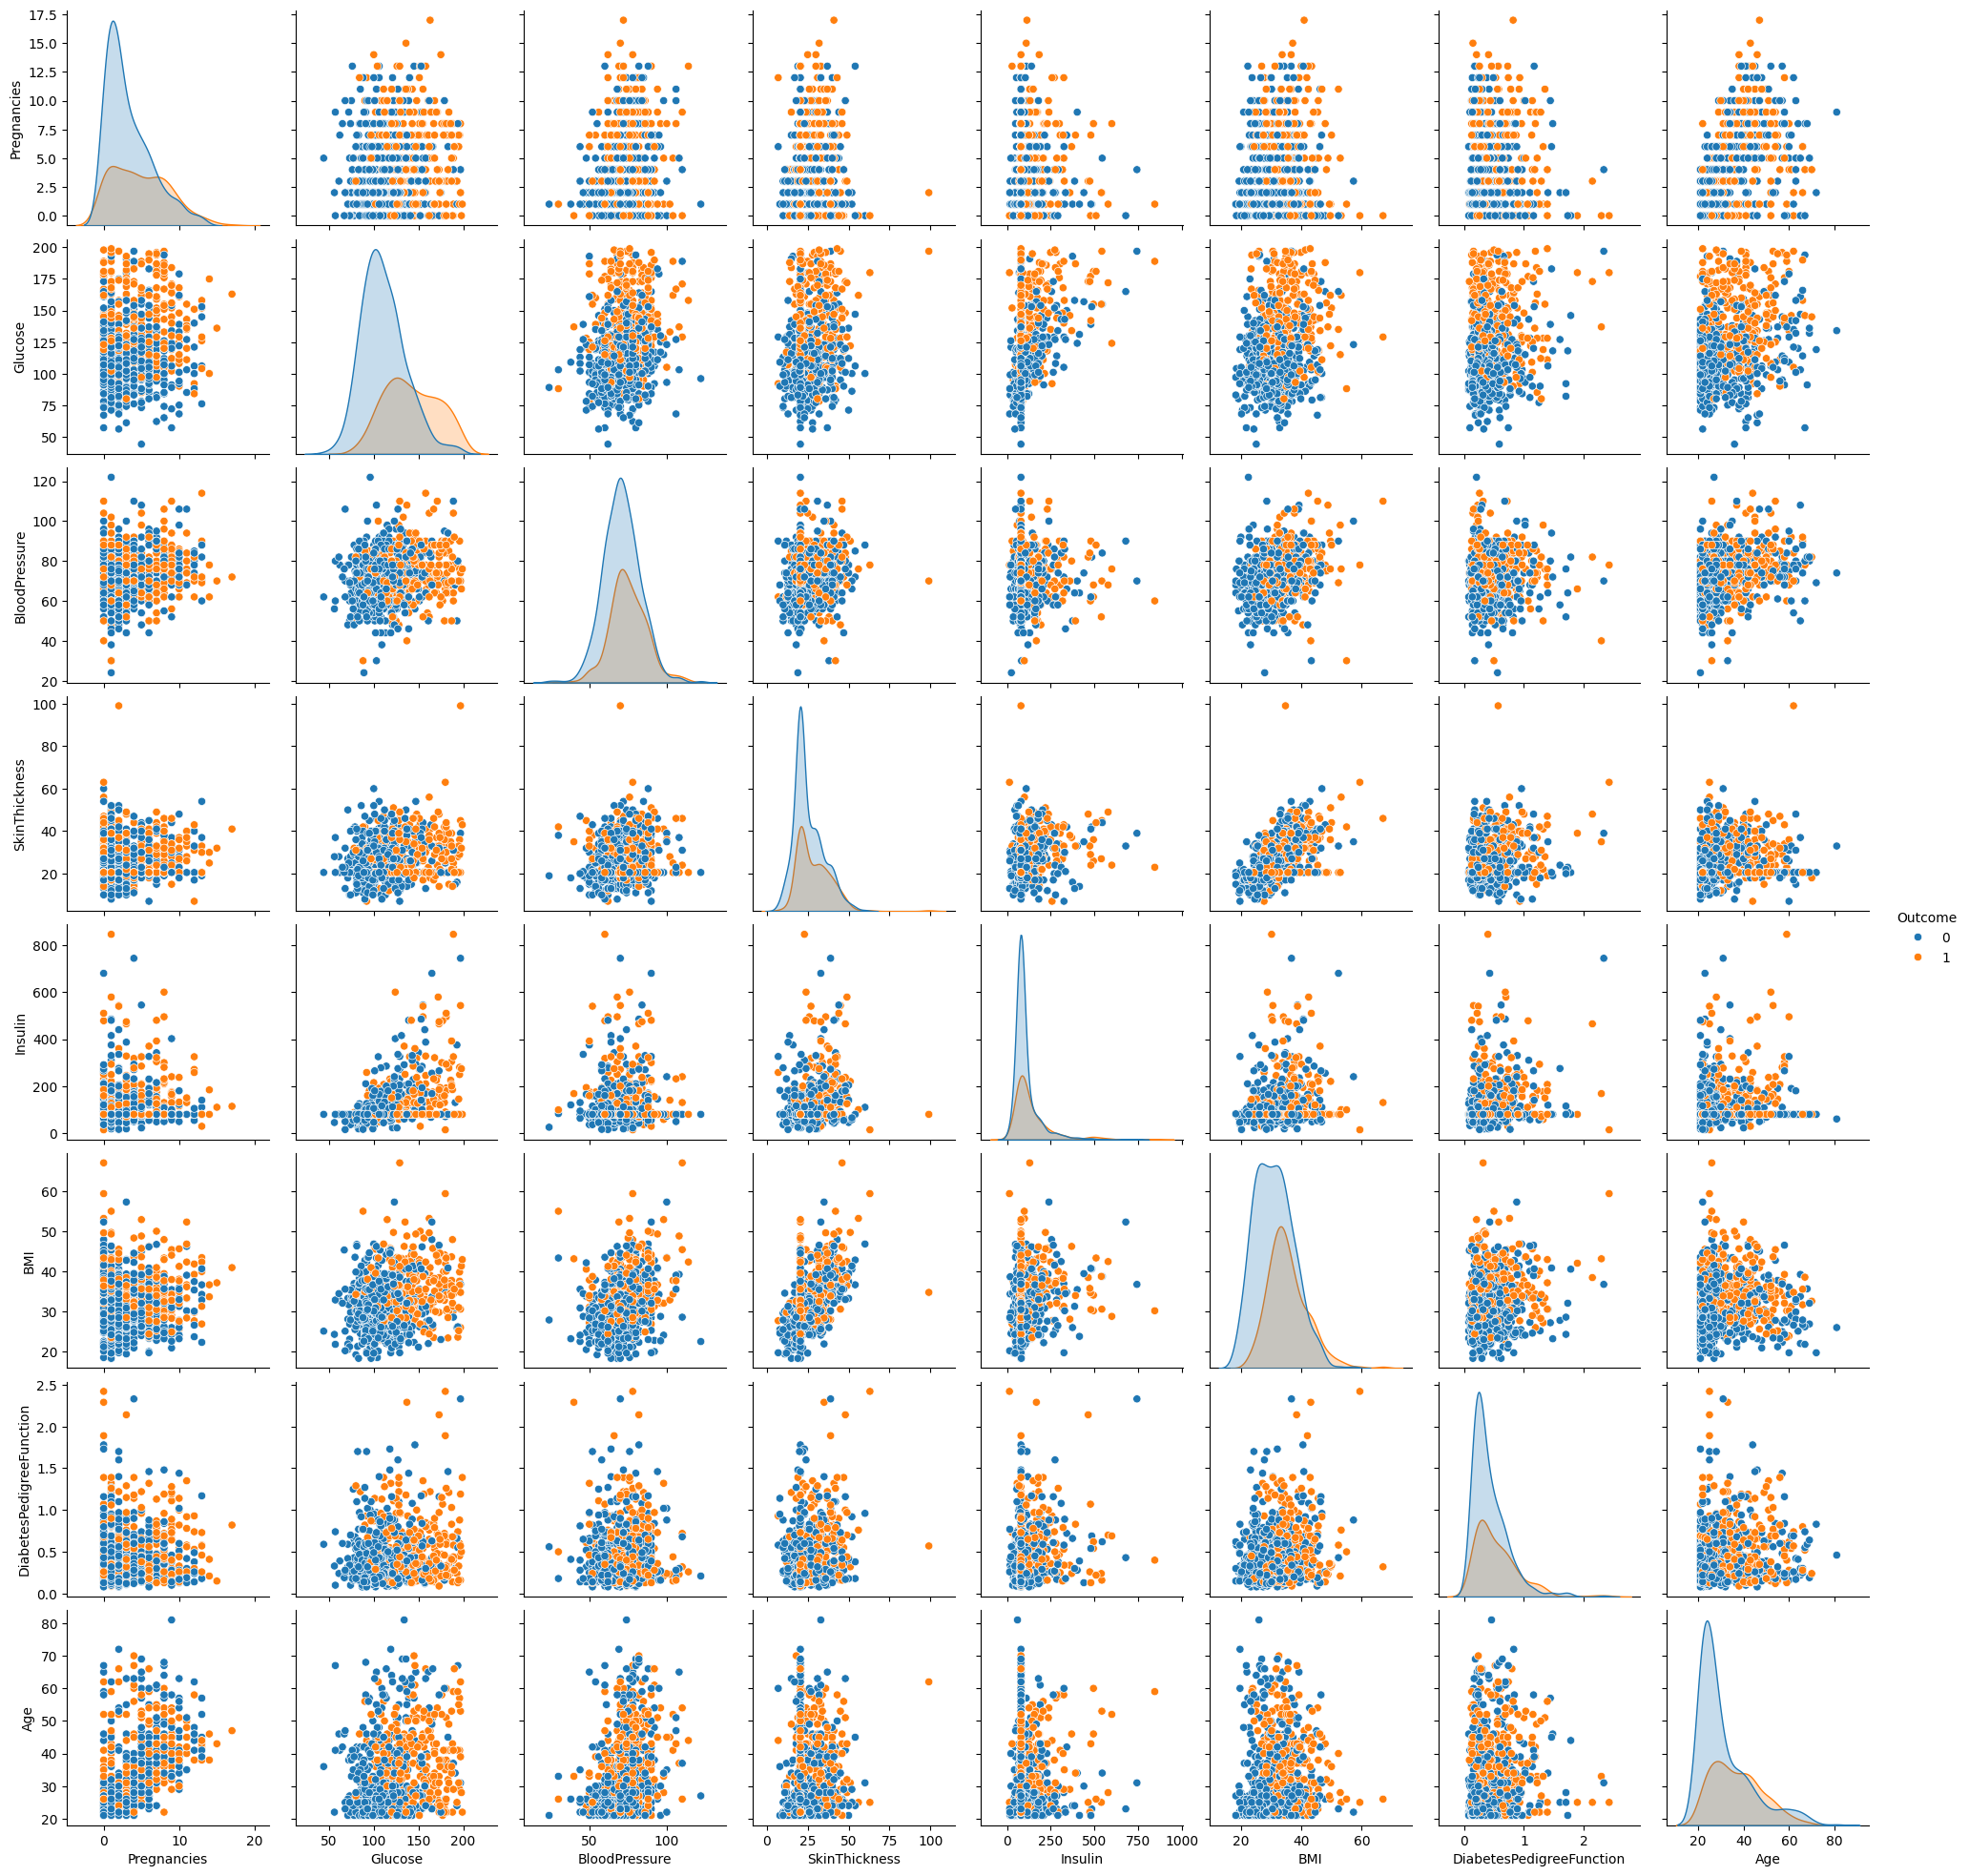

In [86]:
# Visualize the data, outcome is  hue
sn.pairplot(df, hue="Outcome")

<Axes: xlabel='Outcome', ylabel='count'>

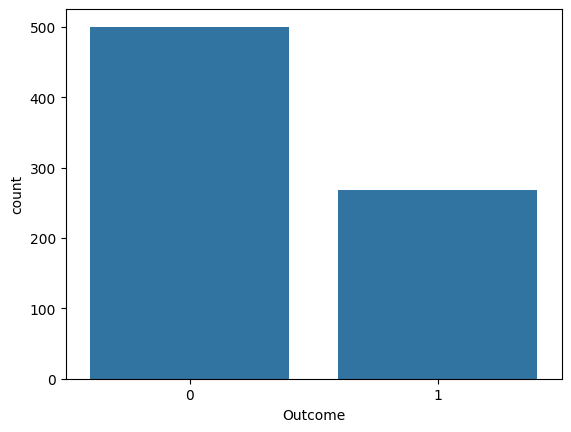

In [87]:
# Visualize the Outcome column
sn.countplot(x='Outcome', data=df)

<Axes: >

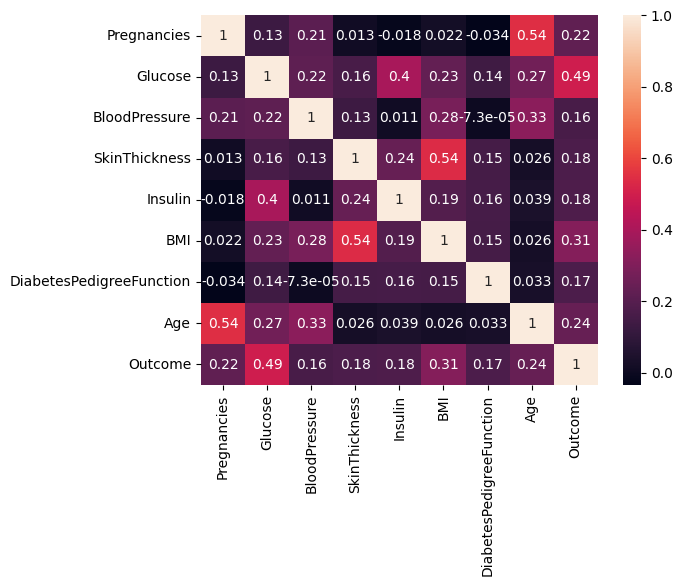

In [88]:
# Find the correlation between the columns
corr = df.corr()
sn.heatmap(corr, annot=True)

<Axes: xlabel='Outcome', ylabel='Glucose'>

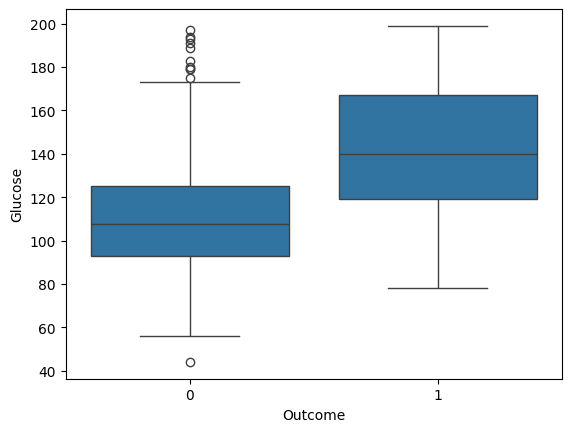

In [89]:
# Finding the relationship between Glucose and Diabetes
sn.boxplot(x='Outcome', y='Glucose', data=df)

<Axes: xlabel='Outcome', ylabel='Age'>

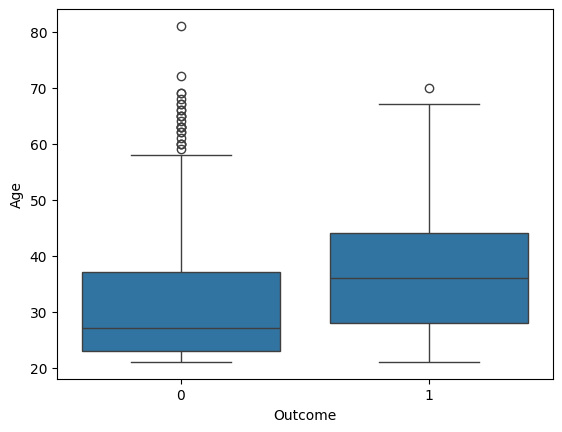

In [90]:
# Finding the relationship between Age and Diabetes
sn.boxplot(x='Outcome', y='Age', data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

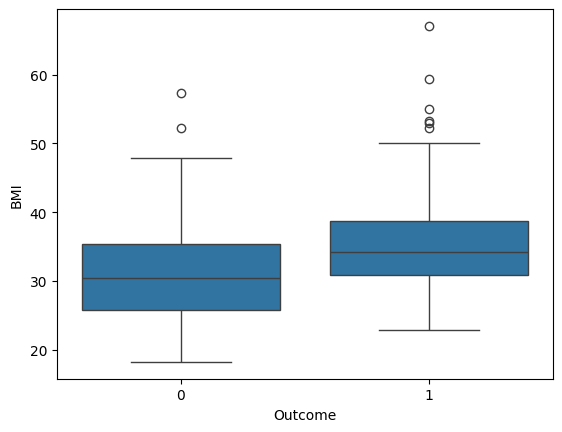

In [91]:
# Finding the relationship between BMI and Diabetes
sn.boxplot(x='Outcome', y='BMI', data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

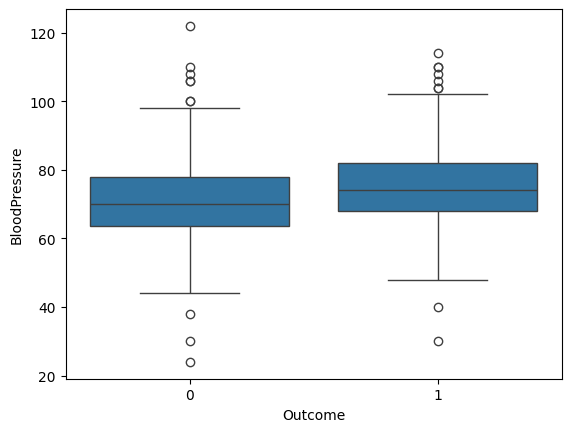

In [92]:
# Finding the relationship between BloodPressure and Diabetes
sn.boxplot(x='Outcome', y='BloodPressure', data=df)


<Axes: xlabel='Age', ylabel='BMI'>

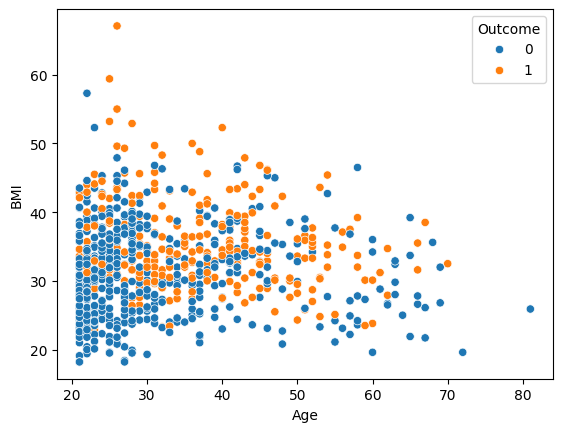

In [93]:
# Relationship Between Age and BMI
sn.scatterplot(x='Age', y='BMI', data=df, hue='Outcome')

<p>Preprocessing<b>

In [94]:
# Checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Pregnancies,4
Glucose,0
BloodPressure,14
SkinThickness,12
Insulin,89
BMI,8
DiabetesPedigreeFunction,28
Age,9
Outcome,0


In [95]:
# Replacing  the outliers with the mean value
imputer_mean = SimpleImputer(strategy='mean')
columns_outliers = outliers[outliers['Outliers'] > 0].index.tolist()

for col in columns_outliers:
    df[col] = df[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])
    df[col] = imputer_mean.fit_transform(df[[col]])


In [96]:
# Checking  again the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [97]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [98]:
#  Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Check the VIF
X_df = pd.DataFrame(X, columns=df.drop('Outcome', axis=1).columns)
vif = pd.DataFrame()
vif["Features"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif

,Features,VIF
0,Pregnancies,1.441126
1,Glucose,1.339884
2,BloodPressure,1.255406
3,SkinThickness,1.511690
4,Insulin,1.315801
5,BMI,1.576856
6,DiabetesPedigreeFunction,1.052062
7,Age,1.627995


In [102]:
log_reg = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of regularization strength

log_reg.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Make predictions
predictions = log_reg.predict(X_test)

In [105]:
accuracy = log_reg.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.7662337662337663


In [106]:
# print the calssification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the  model and fit it
acc = accuracy_score(y_test, predictions)
print("\n Model overall accuracy:{:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154


 Model overall accuracy:76.62%


In [107]:
# Trying a new data:

test = {
    "Pregnancies": [3],
    "Glucose": [15],
    "BloodPressure": [78],
    "SkinThickness": [46],
    "Insulin": [99],
    "BMI": [55],
    "DiabetesPedigreeFunction": [0.21],
    "Age": [43]
}

test = pd.DataFrame(test)
test = scaler.transform(test)

print("All probabilities by category:")
print(log_reg.predict_proba(test))
print("**********************")

labels = ["Diabetes", "Not Diabetes"]

print("Is the Outcome Diabetes or Not?:")
result = labels[int(log_reg.predict(test)[0])]
print(result)

All probabilities by category:
[[0.90010611 0.09989389]]
**********************
Is the Outcome Diabetes or Not?:
Diabetes
